# Basic classification: Classify images of clothing

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels[2]

0

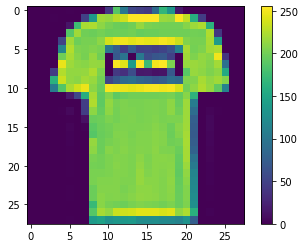

In [6]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

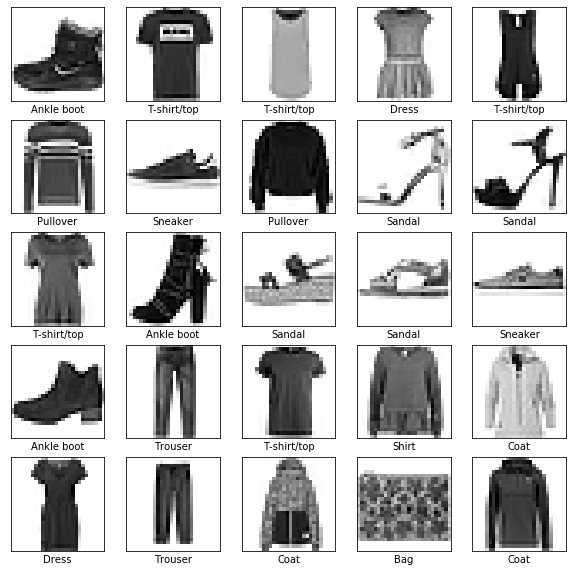

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
pd.DataFrame(class_names, columns=["Class"])

Class
0  T-shirt/top
1      Trouser
2     Pullover
3        Dress
4         Coat
5       Sandal
6        Shirt
7      Sneaker
8          Bag
9   Ankle boot

In [12]:
 model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4972 - accuracy: 0.8258
Epoch 2/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3749 - accuracy: 0.8644
Epoch 3/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3339 - accuracy: 0.8785
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3128 - accuracy: 0.8859
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2945 - accuracy: 0.8907s - loss:
Epoch 6/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2775 - accuracy: 0.8972
Epoch 7/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2669 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2548 - accuracy: 0.9051
Epoch 9/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2464 - accuracy: 0.9085
Epoc

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2707 - accuracy: 0.8825

Test accuracy: 0.8825


In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([4.7275599e-08, 4.5984457e-08, 1.0398391e-08, 2.8652765e-09,
       5.6491736e-09, 8.9560449e-04, 1.6144573e-06, 2.8481456e-02,
       5.9641621e-07, 9.7062063e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

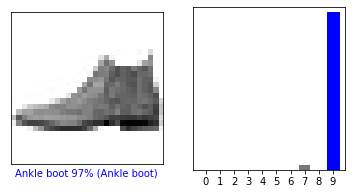

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

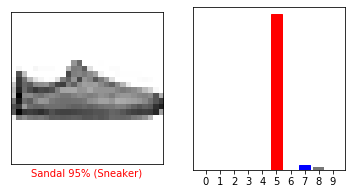

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

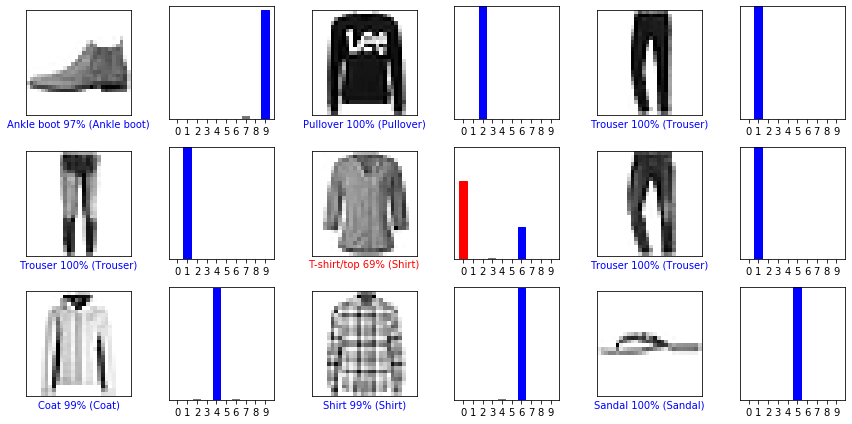

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

In [25]:
# Grab an image from the test dataset.
img = test_images[12]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)
print(np.argmax(predictions_single))

[[3.67769140e-08 6.46038814e-08 4.90411711e-09 1.00796775e-07
  2.29829212e-07 9.54930723e-01 7.86673837e-09 2.84803137e-02
  1.65884867e-02 2.47214715e-09]]
5


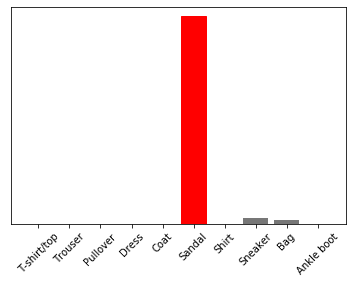

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)